### Calculating a Portfolio of Securities' Rate of Return


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as wb

In [12]:
from iexfinance.stocks import Stock, get_historical_data

start = datetime(2018, 1, 1)
end = datetime(2023, 3, 23)

api_key = 'pk_6083fdda34d8496a8401a87232578e3f'

In [13]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = get_historical_data(t, start, end, output_format = 'pandas', token=api_key)['close']

In [14]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1315 entries, 2018-01-02 to 2023-03-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PG      1315 non-null   object
 1   MSFT    1315 non-null   object
 2   F       1315 non-null   object
 3   GE      1315 non-null   object
dtypes: object(4)
memory usage: 51.4+ KB


In [15]:
mydata.head()

,PG,MSFT,F,GE
2018-01-02,90.65,85.95,12.66,108.894
2018-01-03,90.54,86.35,12.76,109.924
2018-01-04,91.18,87.11,12.98,112.226
2018-01-05,91.24,88.19,13.2,112.286
2018-01-08,91.72,88.28,13.15,110.711


In [16]:
mydata.tail()

,PG,MSFT,F,GE
2023-03-17,142.93,279.43,11.3,90.29
2023-03-20,145.13,272.23,11.18,89.92
2023-03-21,144.08,273.78,11.72,92.18
2023-03-22,143.99,272.29,11.48,89.59
2023-03-23,143.79,277.66,11.42,91.59


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [17]:
mydata.iloc[0]

PG        90.65
MSFT      85.95
F         12.66
GE      108.894
Name: 2018-01-02 00:00:00, dtype: object

In [18]:
(mydata/ mydata.iloc[0]*100)

,PG,MSFT,F,GE
2018-01-02,100.0,100.0,100.0,100.0
2018-01-03,99.878654,100.465387,100.789889,100.945874
2018-01-04,100.584666,101.349622,102.527646,103.059856
2018-01-05,100.650855,102.606166,104.265403,103.114956
2018-01-08,101.180364,102.710878,103.870458,101.668595
...,...,...,...,...
2023-03-17,157.672366,325.107621,89.257504,82.915496
2023-03-20,160.099283,316.730657,88.309637,82.575716
2023-03-21,158.940982,318.534031,92.575039,84.651129
2023-03-22,158.841699,316.800465,90.679305,82.272669


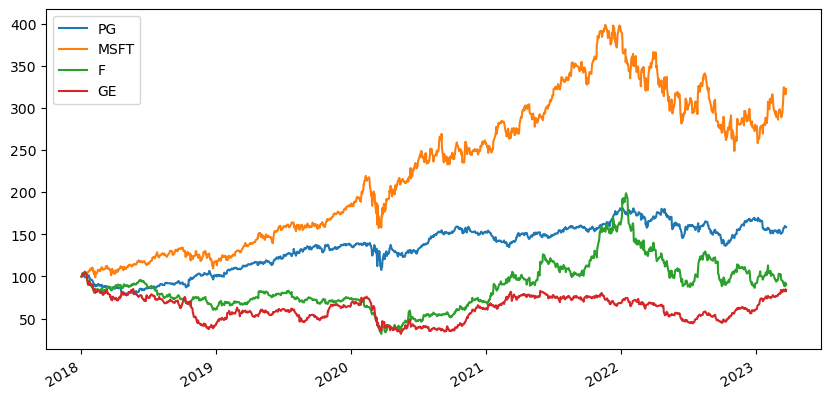

In [20]:
(mydata/ mydata.iloc[0]*100).plot(figsize=(10, 5));
plt.show()

## Calculating the Return of a Portfolio of Securities

In [21]:
simple_returns = (mydata / mydata.shift(1)) - 1
returns = simple_returns.astype('float64')
returns

,PG,MSFT,F,GE
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.001213,0.004654,0.007899,0.009459
2018-01-04,0.007069,0.008801,0.017241,0.020942
2018-01-05,0.000658,0.012398,0.016949,0.000535
2018-01-08,0.005261,0.001021,-0.003788,-0.014027
...,...,...,...,...
2023-03-17,0.000280,0.011694,-0.043993,-0.018267
2023-03-20,0.015392,-0.025767,-0.010619,-0.004098
2023-03-21,-0.007235,0.005694,0.048301,0.025133
2023-03-22,-0.000625,-0.005442,-0.020478,-0.028097


##### Equal Weights

In [51]:
weights_1 = np.array([0.25, 0.25, 0.25, 0.25])

In [61]:
np.dot(returns, weights_1)

array([        nan,  0.00519951,  0.0135133 , ...,  0.0179732 ,
       -0.0136605 ,  0.00885752])

In [62]:
annual_returns = returns.mean()*250
annual_returns

PG      0.111221
MSFT    0.271071
F       0.068010
GE      0.059399
dtype: float64

In [64]:
round(np.dot(annual_returns, weights_1),5)

0.12743

In [59]:
pfolio_1 = str(round(np.dot(annual_returns, weights),4)*100) + '%'
print (pfolio_1)

12.740000000000002%


##### Unequal Weights

In [29]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [47]:
round(np.dot(annual_returns, weights_2),4)

0.1661

In [58]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),4)*100) + '%'
print (pfolio_2)

16.61%


In [45]:
print (pfolio_1)
print (pfolio_2)

12.740000000000002%
16.61%
